### 使用sklearn数据集训练逻辑回归模型
### 调整学习率，样本数据拆分比率，观察训练结果
### 把模型训练参数保存到文件，在另一个代码中加载参数实现预测功能


In [73]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#return_X_y=True则返回(data, target)而不是Bunch对象，否则是一个类似json的Bunch对象
X,y = load_iris(return_X_y=True)
X=X[:100]  # 取前100个数据
y=y[:100]  # 取前100个标签(0,1)
print(X.shape)
print(y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)


(100, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [105]:
#超参设置
theta = np.random.randn(1,4)  # shape (1, 10)
bias = 0
# 超参数
lr = 0.005
epochs = 100  # 训练次数

In [106]:
#正向传播，计算预测值
def forward(X_tain, theta, bias):
    # 线性运算 ，由于X_tain.shape是(100,4)，theta超参设置需要(1,4)
    z = np.dot(theta, X_tain.T) + bias 
    # sigmoid
    y_hat = 1 / (1 + np.exp(-z))  
    return y_hat

def loss(y, y_hat):
    e = 1e-8#为防止y_hat计算值为0，所以加上一个很小的值
    return - y * np.log(y_hat + e) - (1 - y) * np.log(1 - y_hat + e)
def calc_gradient(X_train, y_train, y_hat):
    # 计算梯度 X_train.shape[-1]=4 每个样本的特征数
    m = X_train.shape[-1]
    # theta梯度计算
    delta_theta = np.dot((y_hat - y_train), X_train) / m
    # bias梯度计算
    delta_bias = np.mean(y_hat - y_train)
    # 返回梯度
    return delta_theta, delta_bias


In [107]:
# 初始化空列表来存储每一轮的损失值和梯度值
losses = []
theta_gradients = []
bias_gradients = []

epoch: 0, loss: 2.30409852625123, acc: 0.0
epoch: 1, loss: 2.1206975270329402, acc: 0.0
epoch: 2, loss: 1.9619415493193708, acc: 0.0
epoch: 3, loss: 1.815403511168582, acc: 0.0
epoch: 4, loss: 1.6769289107063887, acc: 0.0
epoch: 5, loss: 1.5462612561316111, acc: 0.0
epoch: 6, loss: 1.4237870194818558, acc: 0.011111111111111112
epoch: 7, loss: 1.3097964980854266, acc: 0.022222222222222223
epoch: 8, loss: 1.2044111305299305, acc: 0.03333333333333333
epoch: 9, loss: 1.107583710683491, acc: 0.05555555555555555
epoch: 10, loss: 1.0191104809568883, acc: 0.07777777777777778
epoch: 11, loss: 0.9386531138835532, acc: 0.1111111111111111
epoch: 12, loss: 0.8657676614633011, acc: 0.2111111111111111
epoch: 13, loss: 0.7999364714922806, acc: 0.28888888888888886
epoch: 14, loss: 0.740599306941309, acc: 0.3888888888888889
epoch: 15, loss: 0.687180828778174, acc: 0.4888888888888889
epoch: 16, loss: 0.6391128020311038, acc: 0.6777777777777778
epoch: 17, loss: 0.5958505104880473, acc: 0.7666666666666667


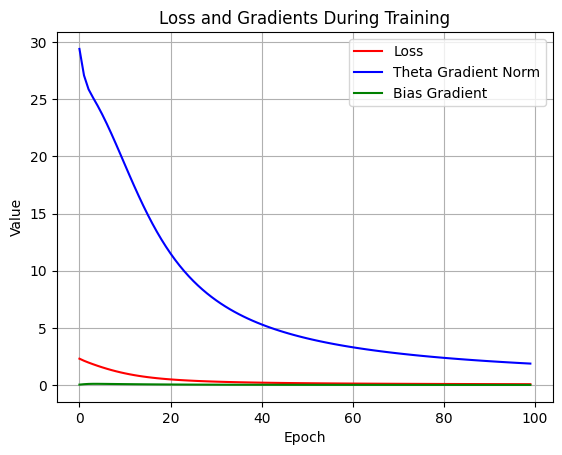

In [108]:
for i in range(epochs):
    # 前向计算
    y_hat = forward(X_train, theta, bias)
    # 计算损失
    loss_val = loss(y_train, y_hat)
    # 记录当前轮次的损失值
    losses.append(np.mean(loss_val))
    # 计算梯度
    delta_theta, delta_bias = calc_gradient(X_train, y_train, y_hat)
    # 记录梯度值
    theta_gradients.append(np.linalg.norm(delta_theta))
    bias_gradients.append(delta_bias)
    # 计算梯度
    delta_theta, delta_bias = calc_gradient(X_train, y_train, y_hat)
    # 更新参数
    theta = theta - lr * delta_theta
    bias = bias - lr * delta_bias
    if i % 1 == 0:
        # 计算准确率
        acc = np.mean(np.round(y_hat) == y_train)  # [False,True,...,False] -> [0,1,...,0]
        print(f"epoch: {i}, loss: {np.mean(loss_val)}, acc: {acc}")
print(f"训练结束，当前theta: {theta}, bias: {bias}")
# 绘制梯度和损失曲线曲线
if len(losses) == len(theta_gradients) == len(bias_gradients) == epochs:
    # 绘制所有曲线在同一张图上
    #plt.figure(figsize=(10, 6))
    plt.plot(range(epochs), losses, color='red', label='Loss')
    plt.plot(range(epochs), theta_gradients, color='blue', label='Theta Gradient Norm')
    plt.plot(range(epochs), bias_gradients, color='green', label='Bias Gradient')
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Loss and Gradients During Training')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print(f"Error: The lengths of losses ({len(losses)}), theta_gradients ({len(theta_gradients)}), and bias_gradients ({len(bias_gradients)}) are not equal to the number of epochs ({epochs})")

In [109]:
# 保存模型参数
np.savez('logistic_regression_model.npz', theta=theta, bias=bias)
print("模型参数已保存到 logistic_regression_model.npz")

模型参数已保存到 logistic_regression_model.npz
